In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nl_df=pd.read_csv("C:/Users/rajbh/Downloads/twitter.csv")

In [3]:
nl_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [4]:
nl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
nl_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [6]:
nl_df=nl_df.drop(['id'],axis=1)

In [7]:
nl_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

<Axes: >

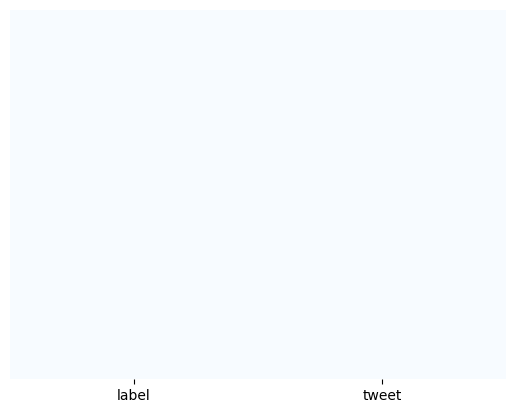

In [8]:
sns.heatmap(nl_df.isnull(),yticklabels=False,cbar=False,cmap="Blues") #checking null elements 

array([[<Axes: title={'center': 'label'}>]], dtype=object)

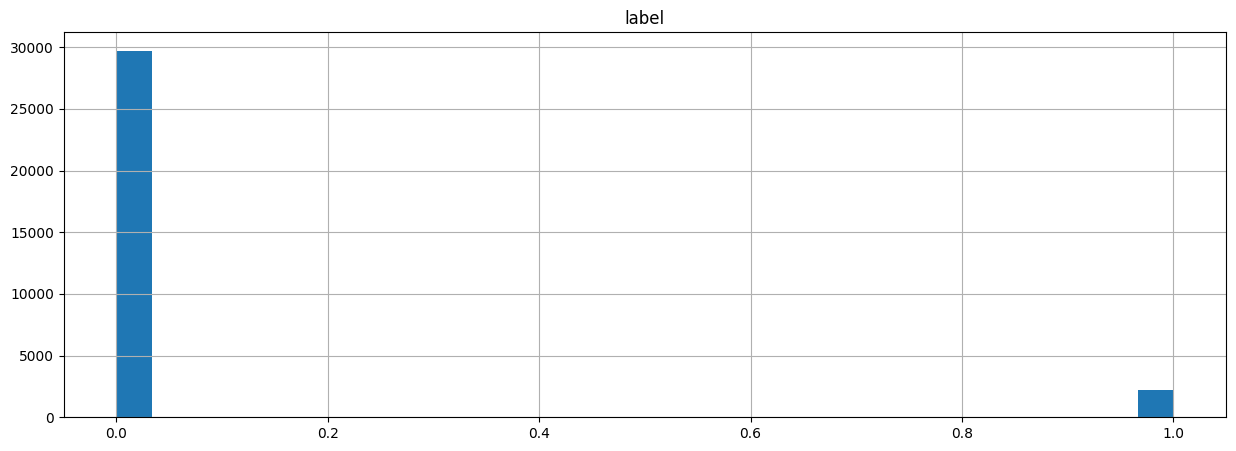

In [9]:
nl_df.hist(bins=30,figsize=(15,5))

This defines i have two classes of data 0 amd 1 

In [10]:
#checking the length of words inside the tweet
nl_df['Length']=nl_df['tweet'].apply(len)
nl_df

label                                              tweet  Length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

In [11]:
nl_df.describe()

label        Length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [12]:
nl_df[nl_df['Length']==11]['tweet'] #shortest tweet 

25195    i love you 
Name: tweet, dtype: object

In [13]:
nl_df[nl_df['Length']==84]['tweet'].iloc[0] #checking 1st tweet of average characters of tweets 

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [14]:
nl_df[nl_df['Length']==54]['tweet'].iloc[65]

'i am thankful for my friends. #thankful #positive     '

<Axes: ylabel='Frequency'>

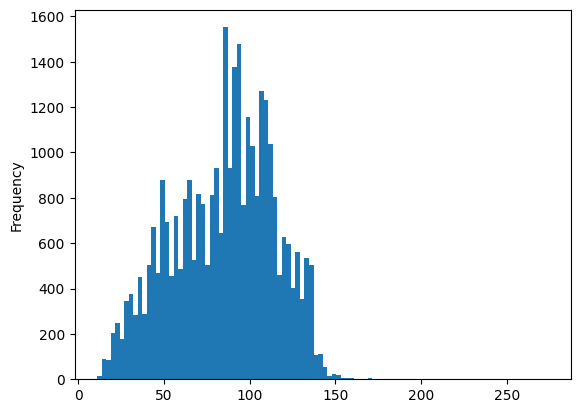

In [15]:
nl_df['Length'].plot(kind='hist', bins=100)

In [16]:
positive=nl_df[nl_df['label']==0]
positive

label                                              tweet  Length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [17]:
negative=nl_df[nl_df['label']==1]
negative

label                                              tweet  Length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [18]:
sentence = nl_df['tweet'].tolist()
len(sentence)

31962

In [19]:
sent_string = " ".join(sentence)

In [20]:
sent_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [21]:
!pip install wordCloud


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


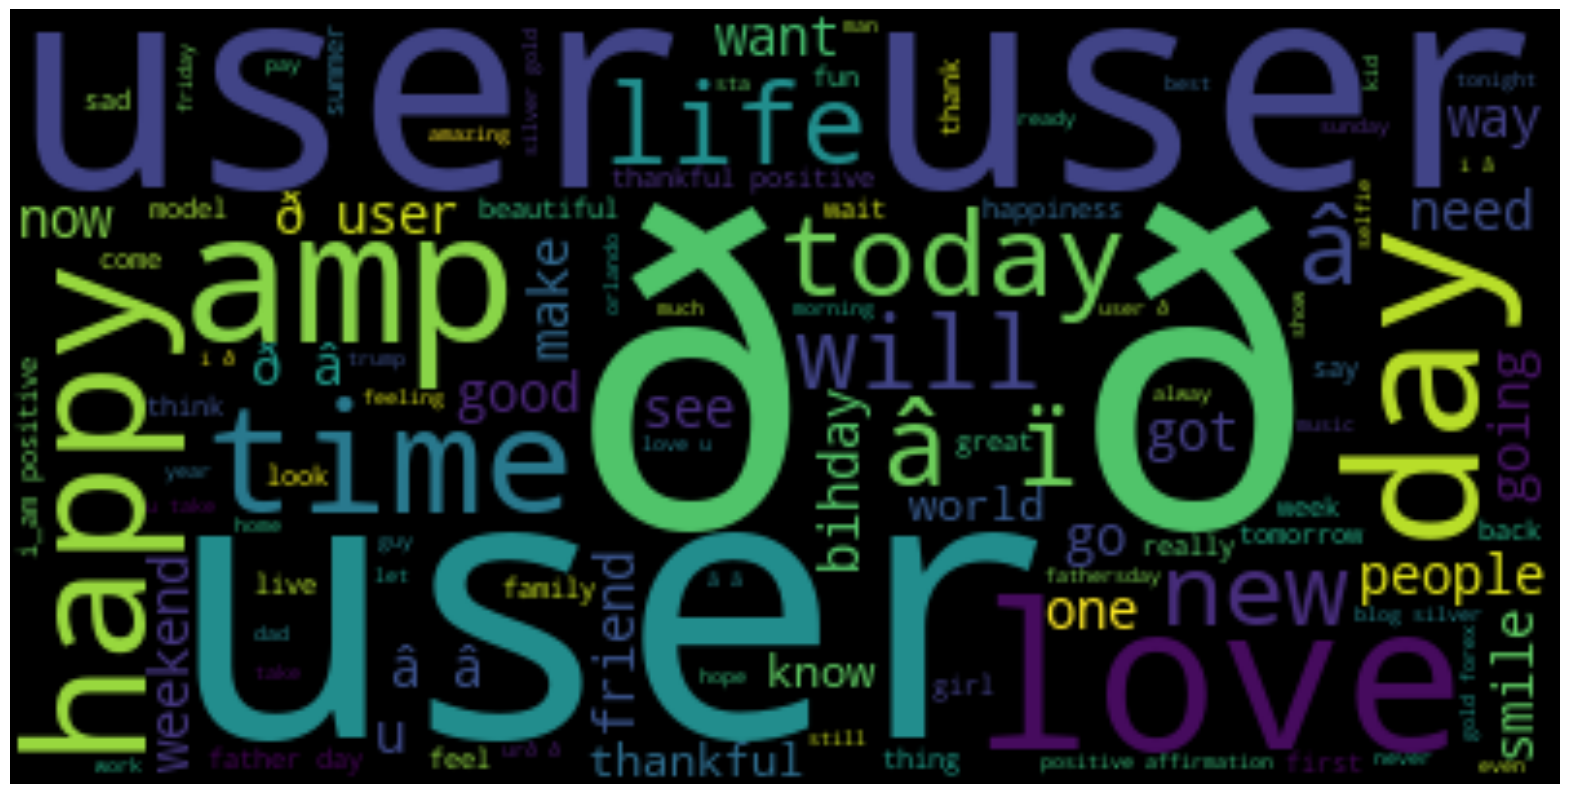

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(sent_string)

# Display the word cloud using matplotlib
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

In [23]:
negative_strings=negative['tweet'].tolist()

In [24]:
sent_negative=" ".join(negative_strings)

In [25]:
neg_wc=WordCloud().generate(sent_negative)

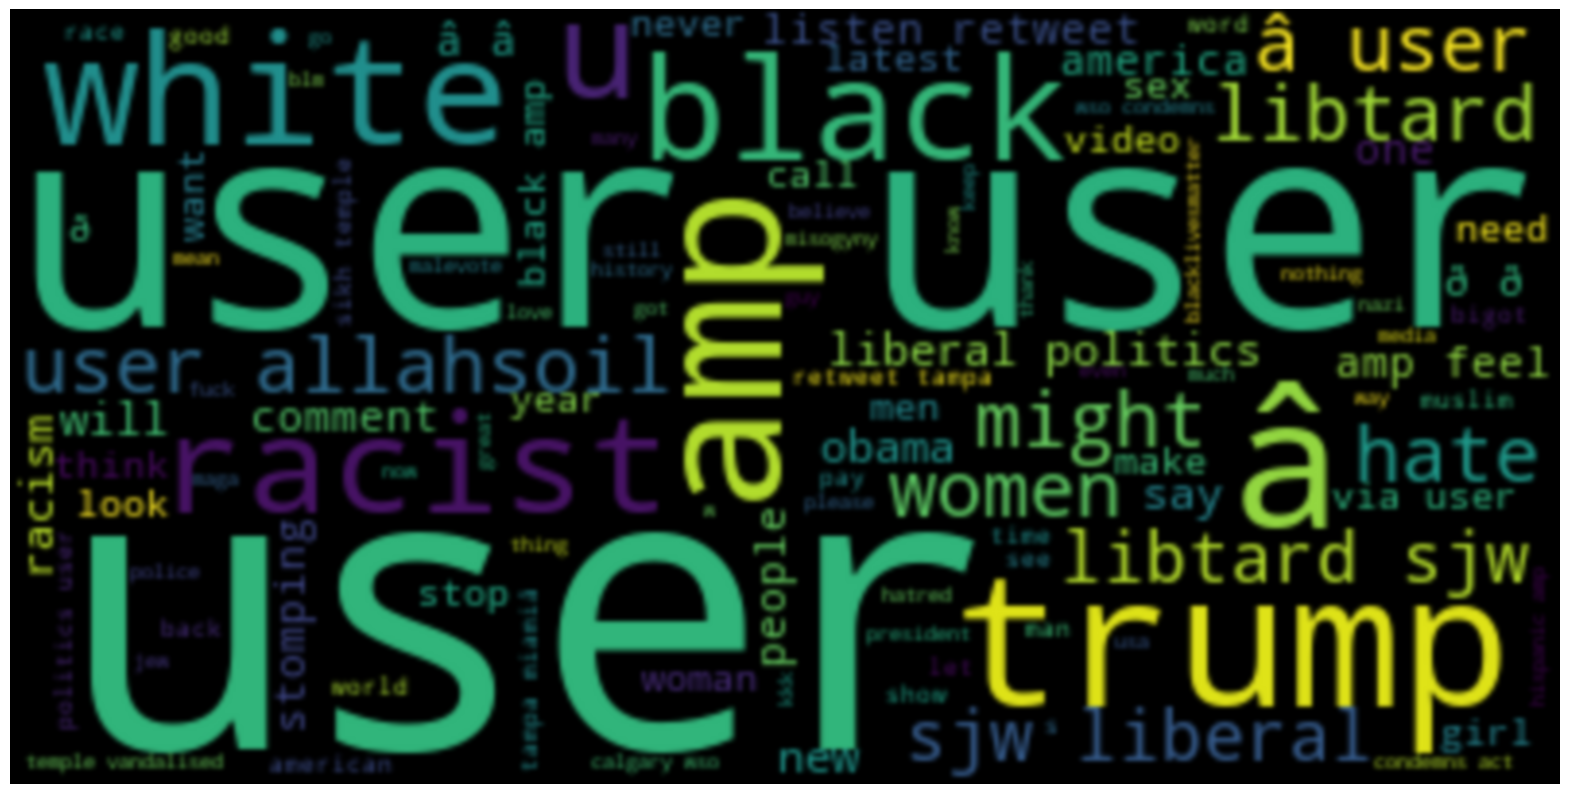

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(neg_wc,interpolation='bicubic')
plt.axis('off')
plt.show()

Data cleaning 
Removing punctuations

In [27]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
Test = '$I love AI & Machine learning!!'

In [29]:
punc_removed=[char for char in Test if char not in string.punctuation]

In [30]:
print(punc_removed,end=" ")

['I', ' ', 'l', 'o', 'v', 'e', ' ', 'A', 'I', ' ', ' ', 'M', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g'] 

In [31]:
join_test=" ".join(punc_removed)


In [32]:
join_test

'I   l o v e   A I     M a c h i n e   l e a r n i n g'

In [33]:
Test2='Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [34]:
print(Test2) #uncleaned  data 

Good morning beautiful people :)... I am having fun learning Machine learning and AI!!


In [35]:
punc_t2=[char for char in Test2 if char not in string.punctuation]

In [36]:
print(punc_t2,end=" ")

['G', 'o', 'o', 'd', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'b', 'e', 'a', 'u', 't', 'i', 'f', 'u', 'l', ' ', 'p', 'e', 'o', 'p', 'l', 'e', ' ', ' ', 'I', ' ', 'a', 'm', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'f', 'u', 'n', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'M', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'a', 'n', 'd', ' ', 'A', 'I'] 

In [37]:
final_text=" ".join(punc_t2) #cleaned data 
final_text

'G o o d   m o r n i n g   b e a u t i f u l   p e o p l e     I   a m   h a v i n g   f u n   l e a r n i n g   M a c h i n e   l e a r n i n g   a n d   A I'

The above few codes have nothing to do with the project it was for my pratice nd beginners to understand how data cleaning works 

In [38]:
#NLP
!pip install nltk


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import nltk

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajbh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
new_st="I enjoy coding artificial intelligence and Machine learning"

In [43]:
new_st_clean=[word for word in new_st.split() if word.lower() not in stopwords.words('English') ]

In [44]:
new_st_clean

['enjoy', 'coding', 'artificial', 'intelligence', 'Machine', 'learning']

In [45]:
#count vectorization or tokenization 
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

In [47]:
vectorizer = CountVectorizer()
x=vectorizer.fit_transform(sample_data)

In [49]:
print(x[2])

  (0, 9)	1
  (0, 3)	1
  (0, 7)	1
  (0, 0)	1
  (0, 8)	1
  (0, 4)	1


In [53]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [54]:
print(x.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [58]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [60]:
nl_df_clean=nl_df['tweet'].apply(message_cleaning)


In [62]:
print(nl_df_clean[5],end=" ")

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo'] 

In [66]:
nl_df['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(nl_df['tweet'])

In [71]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [70]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [72]:
tweets_countvectorizer.shape

(31962, 47386)

In [74]:
X = pd.DataFrame(tweets_countvectorizer.toarray())
X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [76]:
y = nl_df['label']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

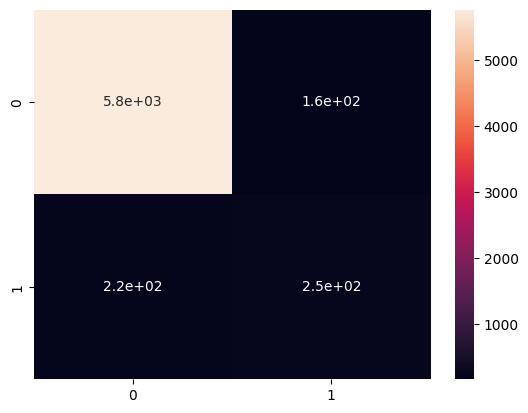

In [80]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [81]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5923
           1       0.60      0.53      0.56       470

    accuracy                           0.94      6393
   macro avg       0.78      0.75      0.77      6393
weighted avg       0.94      0.94      0.94      6393

